In [5]:
%matplotlib inline
# ipython 전용 코드
import matplotlib.pyplot as plt
import tensorflow as tf
import gzip
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data


In [6]:
# 데이터를 불러와서 mnist 변수에 담는다
data_dir = './MNIST_data/'
mnist = input_data.read_data_sets(data_dir, one_hot=True, validation_size=5000)


Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# 데이터를 바이트단위로 불러오는 함수
def _read32(bytestream):
    dt = np.dtype(np.uint32).newbyteorder('>')
    return np.frombuffer(bytestream.read(4), dtype=dt)[0]


In [8]:
# train 데이터를 읽어서 gz 압축을 해제한 후 data, buf에 담는다
with open('./MNIST_data/train-images-idx3-ubyte.gz','rb') as f:
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)

        num_images = _read32(bytestream)
        rows = _read32(bytestream)
        cols = _read32(bytestream)

        buf = bytestream.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        data = data.reshape(num_images,rows,cols)



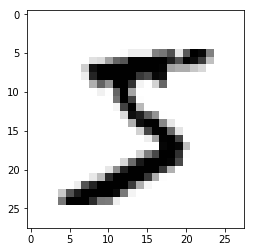

In [9]:
# 숫자가 제대로 출력되는지 확인한다
plt.imshow(data[0,:,:], cmap='gray_r')
plt.show()


In [6]:
# 10 x 10 행렬을 만들기 위해 행과 열의 변수를 선언하고
rows = 10
cols = 10


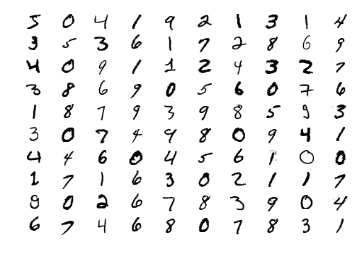

In [7]:
# 10 x 10 짜리 이미지를 확인한다
for r in range(rows):
    for c in range(cols):
        idx = r * cols + c
        plt.subplot(rows, cols , idx +1)
        plt.imshow(data[idx,:,:], cmap='gray_r')
        plt.axis('off')
plt.show()


In [8]:
# 손글씨에 대한 정답이 있는 label 데이터를 읽어온다 (지도학습이므로)
with open('./MNIST_data/train-labels-idx1-ubyte.gz','rb') as f:
    with gzip.GzipFile(fileobj = f) as bytestream:
        magic = _read32(bytestream)
        num_items = _read32(bytestream)

        buf = bytestream.read(num_items)
        labels = np.frombuffer(buf, dtype=np.uint8)


In [9]:
# -----------------------------------------------------------------
# Tensorflow 사용 코드
# -----------------------------------------------------------------


# None 은 내가 얼만큼의 데이터를 넣을지 안 정했을 때 사용한다
x_input = tf.placeholder(tf.float32, [None, 784])
y_input = tf.placeholder(tf.float32, [None, 10])


In [10]:
# 신경망 파라미터들 y = x*w + b
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x_input , W ) + b


In [11]:
# softmax 알고리즘을 실행해서 y값을 최적화하고 cross_entropy를 정의한다
# softmax : 값을 0 ~ 1사이로 정규화시키는 함수 (총합은 1이 되도록 정규화하므로 확률로 변경하는 것과 같다)
y = tf.nn.softmax(y)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_input * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_input, logits=y))

In [12]:
# Gradient Descent 알고리즘을 사용해서 cross_entropy를 최소화한다. 학습율은 0.5
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [13]:
# 세션을 초기화한다
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())


In [14]:
# 1000번의 루프를 돌면서 학습을 진행한다
for _ in range(1000):
	batch_xs, batch_ys = mnist.train.next_batch(100)
	sess.run(train_step, feed_dict={x_input: batch_xs, y_input: batch_ys})


In [15]:
# 정답률을 계산한다
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_input, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict=
			   {x_input: mnist.test.images,
				y_input: mnist.test.labels}))


0.9052
